# Checking for Class Imbalance in Target Variable: Considered Suicide

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier


pd.set_option('display.max_columns', 150, 'display.max_rows', 150)

In [2]:
# Read in data and split data to be used in the models
df = pd.read_csv('modeling_dataset.csv')
df = df.drop(columns=['Unnamed: 0'], axis=1)

print(df.shape)
df.head()

(53548, 60)


,YEAR,raceeth,How old are you,What is your sex,In what grade are you,How tall are you,How much do you weigh,Seat belt use,Riding with a drinking driver,Drinking and driving,Weapon carrying,Weapon carrying at school,Safety concerns at school,Threatened at school,Physical fighting,Physical fighting at school,Forced sexual intercourse,Bullying at school,Electronic bullying,Sad or hopeless,Considered suicide,Made a suicide plan,Attempted suicide,Injurious suicide attempt,Ever cigarette use,Initiation of cigarette smoking,Current cigarette use,Current smokeless tobacco use,Current cigar use,Initiation of alcohol use,Current alcohol use,Source of alcohol,Ever marijuana use,Initiation of marijuana use,Current marijuana use,Ever steroid use,Illegal injected drug use,Illegal drugs at school,Ever sexual intercourse,Sex before 13 years,Multiple sex partners,Current sexual activity,Alcohol/drugs and sex,Condom use,Birth control pill use,Perception of weight,Weight loss,Television watching,Computer use,HIV testing,Asthma,Sleep,Ever used LSD,BMIPCT,weight,stratum,psu,Has used hard drugs,healthy_eating,regular_activity
0,2019.0,7.0,5.0,2.0,2.0,1.63,54.89,4.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,5.0,2.0,2.0,4.0,1.0,46.882141,1.6659,213.0,57923.0,0.0,1.0,1.0
1,2019.0,8.0,4.0,2.0,2.0,1.60,53.98,5.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,5.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,3.0,3.0,2.0,2.0,4.0,1.0,62.232194,1.3851,213.0,57923.0,0.0,1.0,1.0
2,2019.0,8.0,4.0,1.0,2.0,1.68,43.09,4.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,2.0,4.0,3.0,2.0,5.0,1.0,0.590171,1.4958,213.0,57923.0,0.0,1.0,0.0
3,2019.0,5.0,4.0,2.0,2.0,1.78,68.95,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,4.0,3.0,1.0,1.0,5.0,3.0,7.0,7.0,4.0,6.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,7.0,7.0,2.0,3.0,4.0,3.0,69.786634,1.7114,213.0,57923.0,1.0,1.0,0.0
4,2019.0,6.0,5.0,2.0,2.0,1.78,58.97,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,4.0,1.0,4.0,2.0,2.0,2.0,1.0,16.739994,1.6659,213.0,57923.0,0.0,1.0,0.0


In [4]:
# Create matrix of features
to_drop = ['Considered suicide','Made a suicide plan','Attempted suicide','Injurious suicide attempt']
X = df.drop(columns = to_drop, axis = 1) # grabs everything else but target

# Create target variable
y = df['Considered suicide'] # y is the column we're trying to predict


In [5]:
X.describe()

,YEAR,raceeth,How old are you,What is your sex,In what grade are you,How tall are you,How much do you weigh,Seat belt use,Riding with a drinking driver,Drinking and driving,Weapon carrying,Weapon carrying at school,Safety concerns at school,Threatened at school,Physical fighting,Physical fighting at school,Forced sexual intercourse,Bullying at school,Electronic bullying,Sad or hopeless,Ever cigarette use,Initiation of cigarette smoking,Current cigarette use,Current smokeless tobacco use,Current cigar use,Initiation of alcohol use,Current alcohol use,Source of alcohol,Ever marijuana use,Initiation of marijuana use,Current marijuana use,Ever steroid use,Illegal injected drug use,Illegal drugs at school,Ever sexual intercourse,Sex before 13 years,Multiple sex partners,Current sexual activity,Alcohol/drugs and sex,Condom use,Birth control pill use,Perception of weight,Weight loss,Television watching,Computer use,HIV testing,Asthma,Sleep,Ever used LSD,BMIPCT,weight,stratum,psu,Has used hard drugs,healthy_eating,regular_activity
count,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,5.354800e+04,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000,53548.000000
mean,2014.679092,5.126653,5.087286,1.481829,2.480541,1.688293,67.017479,4.352338,1.388493,1.519328,1.408661,1.103533,1.109715,1.141219,1.520169,1.138156,1.927374,1.811291,1.854560,1.677990,1.671080,2.055726,1.348248,1.173527,1.217394,3.429316,1.576417,2.541570,2.324419,2.699186,1.572085,1.057444,1.018152,1.766359,1.571917,2.992007,2.145346,1.896934,1.786341,1.606876,2.300627,3.206488,2.021831,3.443079,4.081889,1.991111,1.821506,3.656439,1.109416,6.213372e+01,1.082591,164.717002,264860.247479,0.220662,0.945003,0.752783
std,2.815448,1.510659,1.228198,0.499674,1.121861,0.098875,16.683080,0.939576,0.914615,0.702596,1.094574,0.584567,0.498348,0.727962,1.216012,0.613862,0.259525,0.391281,0.352547,0.467251,0.469825,1.884897,1.184557,0.870642,0.851894,2.188578,1.070177,2.454069,2.050970,2.191601,1.282910,0.444195,0.177988,0.423150,0.494806,2.505909,1.773185,1.278619,0.933065,0.763048,1.805916,0.779903,1.163381,1.808349,2.097703,0.441633,0.470584,1.307949,0.538331,2.784126e+01,0.941813,50.440779,178287.459596,0.414697,0.227977,0.431398
min,2011.000000,1.000000,1.000000,1.000000,1.000000,1.270000,24.950000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.039970e-08,0.028600,101.000000,10530.000000,0.000000,0.000000,0.000000
25%,2013.000000,5.000000,4.000000,1.000000,1.000000,1.630000,56.700000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,4.429519e+01,0.463000,104.000000,88352.000000,0.000000,1.000000,1.000000
50%,2015.000000,5.000000,5.000000,1.000000,2.000000,1.680000,62.600000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000

### Creating Dummy Variables for Categorical Data

In [6]:
#Turn all features into object types
X = X.astype('object')

In [7]:
#Return columns below into numneri dtype
cols = ['How tall are you', 'How much do you weigh', 'BMIPCT', 'weight', 'stratum','psu']
X[cols] = X[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [8]:
#Dummify columns containing object dtypes
obj = X.select_dtypes(exclude=['float']).columns

dummy_obj = pd.get_dummies(X[obj],drop_first=False)

In [9]:
#Drop 
X.drop(obj,axis=1,inplace=True)

X = pd.concat([X,dummy_obj],axis=1)

print(X.shape)
X.head()

(53548, 266)


,How tall are you,How much do you weigh,BMIPCT,weight,stratum,psu,YEAR_2011.0,YEAR_2013.0,YEAR_2015.0,YEAR_2017.0,YEAR_2019.0,raceeth_1.0,raceeth_2.0,raceeth_3.0,raceeth_4.0,raceeth_5.0,raceeth_6.0,raceeth_7.0,raceeth_8.0,How old are you_1.0,How old are you_2.0,How old are you_3.0,How old are you_4.0,How old are you_5.0,How old are you_6.0,How old are you_7.0,What is your sex_1.0,What is your sex_2.0,In what grade are you_1.0,In what grade are you_2.0,In what grade are you_3.0,In what grade are you_4.0,In what grade are you_5.0,Seat belt use_1.0,Seat belt use_2.0,Seat belt use_3.0,Seat belt use_4.0,Seat belt use_5.0,Riding with a drinking driver_1.0,Riding with a drinking driver_2.0,Riding with a drinking driver_3.0,Riding with a drinking driver_4.0,Riding with a drinking driver_5.0,Drinking and driving_1.0,Drinking and driving_2.0,Drinking and driving_3.0,Drinking and driving_4.0,Drinking and driving_5.0,Drinking and driving_6.0,Weapon carrying_1.0,Weapon carrying_2.0,Weapon carrying_3.0,Weapon carrying_4.0,Weapon carrying_5.0,Weapon carrying at school_1.0,Weapon carrying at school_2.0,Weapon carrying at school_3.0,Weapon carrying at school_4.0,Weapon carrying at school_5.0,Safety concerns at school_1.0,Safety concerns at school_2.0,Safety concerns at school_3.0,Safety concerns at school_4.0,Safety concerns at school_5.0,Threatened at school_1.0,Threatened at school_2.0,Threatened at school_3.0,Threatened at school_4.0,Threatened at school_5.0,Threatened at school_6.0,Threatened at school_7.0,Threatened at school_8.0,Physical fighting_1.0,Physical fighting_2.0,Physical fighting_3.0,...,Multiple sex partners_3.0,Multiple sex partners_4.0,Multiple sex partners_5.0,Multiple sex partners_6.0,Multiple sex partners_7.0,Current sexual activity_1.0,Current sexual activity_2.0,Current sexual activity_3.0,Current sexual activity_4.0,Current sexual activity_5.0,Current sexual activity_6.0,Current sexual activity_7.0,Current sexual activity_8.0,Alcohol/drugs and sex_1.0,Alcohol/drugs and sex_2.0,Alcohol/drugs and sex_3.0,Condom use_1.0,Condom use_2.0,Condom use_3.0,Birth control pill use_1.0,Birth control pill use_2.0,Birth control pill use_3.0,Birth control pill use_4.0,Birth control pill use_5.0,Birth control pill use_6.0,Birth control pill use_7.0,Birth control pill use_8.0,Perception of weight_1.0,Perception of weight_2.0,Perception of weight_3.0,Perception of weight_4.0,Perception of weight_5.0,Weight loss_1.0,Weight loss_2.0,Weight loss_3.0,Weight loss_4.0,Television watching_1.0,Television watching_2.0,Television watching_3.0,Television watching_4.0,Television watching_5.0,Television watching_6.0,Television watching_7.0,Computer use_1.0,Computer use_2.0,Computer use_3.0,Computer use_4.0,Computer use_5.0,Computer use_6.0,Computer use_7.0,HIV testing_1.0,HIV testing_2.0,HIV testing_3.0,Asthma_1.0,Asthma_2.0,Asthma_3.0,Sleep_1.0,Sleep_2.0,Sleep_3.0,Sleep_4.0,Sleep_5.0,Sleep_6.0,Sleep_7.0,Ever used LSD_1.0,Ever used LSD_2.0,Ever used LSD_3.0,Ever used LSD_4.0,Ever used LSD_5.0,Ever used LSD_6.0,Has used hard drugs_0.0,Has used hard drugs_1.0,healthy_eating_0.0,healthy_eating_1.0,regular_activity_0.0,regular_activity_1.0
0,1.63,54.89,46.882141,1.6659,213.0,57923.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1
1,1.60,53.98,62.232194,1.3851,213.0,57923.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1
2,1.68,43.09,0.590171,1.4958,213.0,57923.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0

In [10]:
print(y.value_counts())
print('--------------------')
print(y.value_counts(normalize=True))

2.0    44177
1.0     9371
Name: Considered suicide, dtype: int64
--------------------
2.0    0.824998
1.0    0.175002
Name: Considered suicide, dtype: float64


## Train-Test-Split

In [11]:
# Use x and y variables to split the training data into train and test set then scale that data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

## Fit a KNN model

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=4)

In [16]:
knn.fit(X_train, y_train)

knn_preds = knn.predict(X_test)

knn_f1 = metrics.f1_score(y_test, knn_preds)


print(knn_f1)

0.3477303988995874


[[  632  1647]
 [  724 10384]]
              precision    recall  f1-score   support

         1.0       0.47      0.28      0.35      2279
         2.0       0.86      0.93      0.90     11108

    accuracy                           0.82     13387
   macro avg       0.66      0.61      0.62     13387
weighted avg       0.80      0.82      0.80     13387

Accuracy: 0.8228878762979009
Precision: 0.46607669616519176
Recall: 0.2773146116717859
F1: 0.3477303988995874
ROC-AUC: 0.6060681808809055
0.6439118130130896


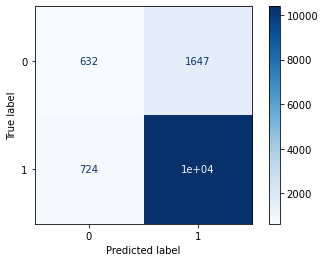

In [18]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import cross_val_score


# Confusion matrix and classification report
print(confusion_matrix(y_test, knn_preds))
print(classification_report(y_test, knn_preds))

print('Accuracy:', metrics.accuracy_score(y_test, knn_preds))
print('Precision:', metrics.precision_score(y_test, knn_preds))
print('Recall:', metrics.recall_score(y_test, knn_preds))
print('F1:', metrics.f1_score(y_test, knn_preds))
print('ROC-AUC:', metrics.roc_auc_score(y_test, knn_preds))

#cross validation score
score = cross_val_score(knn, X, y, cv = 10)
print(score.mean())


# classes= ['Yes', 'No']
cm = confusion_matrix(y_test, knn_preds )
# print(cm)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap='Blues')
plt.show()

In [19]:
#ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_preds)
plt.plot(fpr, tpr)
plt.show()

ValueError: y_true takes value in {1.0, 2.0} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.